# Lab 4: Fuzzy Logic Cost-Benefit Analysis

In [1]:
!pip install -U scikit-fuzzy matplotlib

In [2]:
import numpy as np
import skfuzzy
from skfuzzy import control
import matplotlib.pyplot as plt

## Step 1. Define the domains for the inputs and output

In [6]:
star_power_range = np.linspace(0, 10, 11)
hype_range = np.linspace(0, 10, 11)
anticipation_range = np.linspace(0, 10, 11)

## Step 2. Create fuzzy variables (Antecedents and Consequent)

In [7]:
star_power = control.Antecedent(star_power_range, 'star_power')
hype = control.Antecedent(hype_range, 'hype')
anticipation = control.Consequent(anticipation_range, 'anticipation')

## Step 3. Set membership functions for each variable

In [8]:
star_power['rookie'] = skfuzzy.trimf(star_power_range, [0, 0, 5])
star_power['superstar'] = skfuzzy.trimf(star_power_range, [5, 10, 10])

hype['low'] = skfuzzy.trimf(hype_range, [0, 0, 5])
hype['major'] = skfuzzy.trimf(hype_range, [5, 10, 10])

anticipation['boring'] = skfuzzy.trimf(anticipation_range, [0, 0, 5])
anticipation['average'] = skfuzzy.trimf(anticipation_range, [3, 5, 7])
anticipation['must_see'] = skfuzzy.trimf(anticipation_range, [5, 10, 10])

## Step 4: Visualize Membership Functions

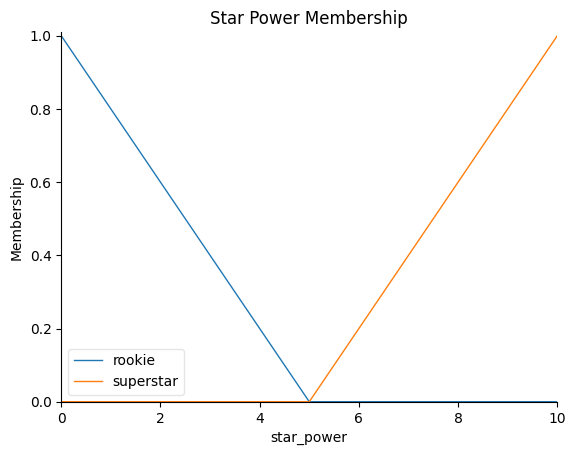

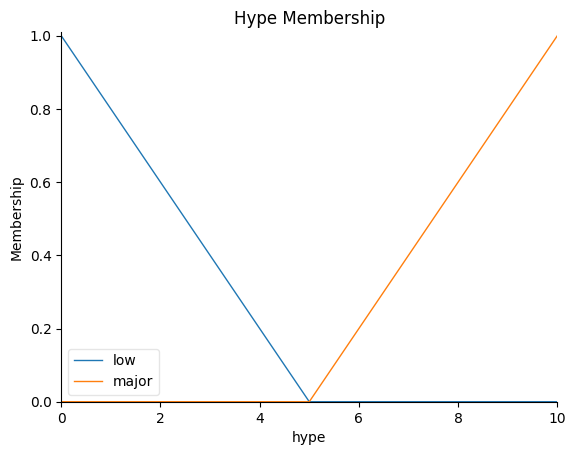

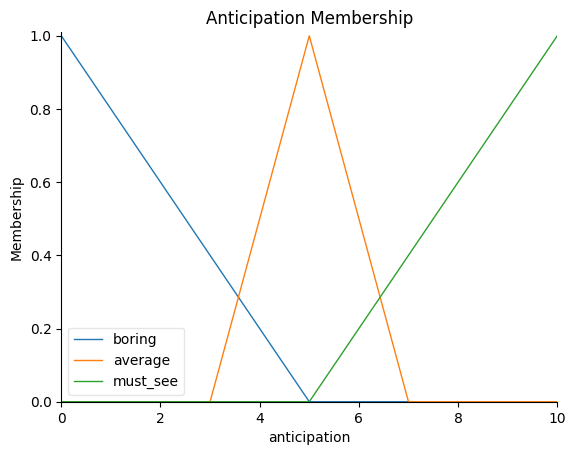

In [15]:
star_power.view()
plt.title('Star Power Membership')
plt.show()

hype.view()
plt.title('Hype Membership')
plt.show()

anticipation.view()
plt.title('Anticipation Membership')
plt.show()

## Step 5: Establish Fuzzy Decision Rules

In [10]:
rules = [
    control.Rule(star_power['rookie'] & hype['major'], anticipation['average']),
    control.Rule(star_power['superstar'] & hype['major'], anticipation['must_see']),
    control.Rule(star_power['rookie'] & hype['low'], anticipation['boring']),
    control.Rule(star_power['superstar'] & hype['low'], anticipation['average']),
]

## Step 6: Construct and Configure Fuzzy Control System

In [11]:
wwe_system = control.ControlSystem(rules)
wwe_simulator = control.ControlSystemSimulation(wwe_system)

## Step 7: Input Crisp Values for Inference

In [12]:
test_star_power = 9   # Example: very high star power
test_hype = 3         # Example: low/medium hype
wwe_simulator.input['star_power'] = test_star_power
wwe_simulator.input['hype'] = test_hype
print(f'Step 7: Entered values -> Star Power: {test_star_power}, Hype: {test_hype}')

Step 7: Entered values -> Star Power: 9, Hype: 3


## Step 8: Perform Fuzzy Inference and Compute Output

In [13]:
wwe_simulator.compute()
final_anticipation = wwe_simulator.output['anticipation']
print(f'Step 8: Output value (Anticipation): {final_anticipation:.2f} (Range: 0=boring, 10=must see)')

Step 8: Output value (Anticipation): 5.00 (Range: 0=boring, 10=must see)


## Step 9: Visualize Defuzzified Output and Fuzzy Set

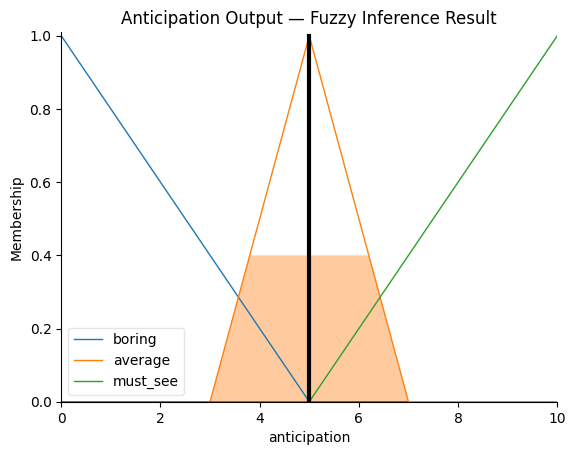

In [14]:
anticipation.view(sim=wwe_simulator)
plt.title('Anticipation Output — Fuzzy Inference Result')
plt.show()

# Conclusion

In this lab, we implemented a fuzzy logic inference system to model decision-making under uncertainty using two input variables star power and hype to predict the anticipation level for a WWE wrestling match. The process began with defining suitable membership functions for each variable, establishing a set of IF-THEN rules based on domain knowledge, and then carrying out fuzzification, rule evaluation, aggregation, and defuzzification.

The results demonstrated that fuzzy logic provides a systematic method for translating qualitative human reasoning into quantitative outputs. By employing fuzzy sets, the system can handle vagueness in linguistic categories such as “superstar,” "major hype," or "must see," and process these to yield a crisp, interpretable decision score. Visualization of both membership functions and the final inferred output further clarified how different input conditions affect the results.

Overall, this experiment confirms that fuzzy logic systems are effective tools for modeling subjective judgments and making robust decisions in cases where input data or rules are inherently imprecise.

In [ ]:
!jupyter nbconvert --to webpdf "D:/Github/Data-Science-And-Machine-Learning-Course/Decision Support System/4. Fuzzy Lab/Fuzzy Logic Implementation.ipynb" --output-dir="D:/Github/Data-Science-And-Machine-Learning-Course/Decision Support System" --output="4_Fuzzy_Logic_Implementation" --allow-chromium-download